# RadioML 2016.10a Êï∞ÊçÆÈõÜÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê (EDA)

Êú¨Á¨îËÆ∞Êú¨ÂØπRadioML 2016.10aÊï∞ÊçÆÈõÜËøõË°åÂÖ®Èù¢ÁöÑÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêÔºåÂåÖÊã¨Ôºö
- Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØÂíåÁªüËÆ°ÁâπÂæÅ
- Ë∞ÉÂà∂Á±ªÂûãÂíå‰ø°Âô™ÊØîÂàÜÂ∏É
- ‰ø°Âè∑Êó∂ÂüüÂíåÈ¢ëÂüüÁâπÂæÅÂèØËßÜÂåñ
- ÊòüÂ∫ßÂõæÂàÜÊûê
- ‰∏çÂêåSNR‰∏ãÁöÑ‰ø°Âè∑Ë¥®ÈáèÂàÜÊûê

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÂõæË°®Ê†∑Âºè
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# sns.set_style("whitegrid")
# plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['figure.dpi'] = 100

print("Â∑≤ÂØºÂÖ•ÊâÄÈúÄÂ∫ì")

Â∑≤ÂØºÂÖ•ÊâÄÈúÄÂ∫ì


In [2]:
def load_radioml_data(file_path):
    """Âä†ËΩΩRadioMLÊï∞ÊçÆÈõÜ"""
    print(f"Ê≠£Âú®‰ªé {file_path} Âä†ËΩΩÊï∞ÊçÆÈõÜ...")
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='latin1')
        print("Êï∞ÊçÆÈõÜÂä†ËΩΩÊàêÂäüÔºÅ")
        return data
    except Exception as e:
        print(f"Âä†ËΩΩÊï∞ÊçÆÈõÜÊó∂Âá∫Èîô: {e}")
        return None

# Âä†ËΩΩÊï∞ÊçÆÈõÜ
dataset_path = "../RML2016.10a_dict.pkl"
dataset = load_radioml_data(dataset_path)

Ê≠£Âú®‰ªé ../RML2016.10a_dict.pkl Âä†ËΩΩÊï∞ÊçÆÈõÜ...
Êï∞ÊçÆÈõÜÂä†ËΩΩÊàêÂäüÔºÅ


In [3]:
# Âü∫Êú¨Êï∞ÊçÆÈõÜ‰ø°ÊÅØÊé¢Á¥¢
if dataset is not None:
    print("\n=== RadioML 2016.10a Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ ===")
    
    # Ëé∑ÂèñË∞ÉÂà∂Á±ªÂûãÂíåSNRÂÄº
    snrs = sorted(list(set([k[1] for k in dataset.keys()])))
    mods = sorted(list(set([k[0] for k in dataset.keys()])))
    
    print(f"\nË∞ÉÂà∂Á±ªÂûãÊï∞Èáè: {len(mods)}")
    print(f"Ë∞ÉÂà∂Á±ªÂûã: {mods}")
    
    print(f"\nSNRËåÉÂõ¥: {min(snrs)} Âà∞ {max(snrs)} dB")
    print(f"SNRÊ≠•Èïø: {snrs[1] - snrs[0]} dB")
    print(f"SNRÊï∞Èáè: {len(snrs)}")
    print(f"SNRÂÄº: {snrs}")
    
    # Ëé∑ÂèñÊï∞ÊçÆÊ†∑Êú¨‰ø°ÊÅØ
    example_key = list(dataset.keys())[0]
    example_data = dataset[example_key]
    print(f"\nÂçï‰∏™Ê†∑Êú¨ÂΩ¢Áä∂: {example_data.shape}")
    print(f"ÊØè‰∏™Ë∞ÉÂà∂-SNRÁªÑÂêàÁöÑÊ†∑Êú¨Êï∞: {len(example_data)}")
    
    # ËÆ°ÁÆóÊÄªÊ†∑Êú¨Êï∞
    total_samples = sum(len(dataset[k]) for k in dataset.keys())
    print(f"\nÊÄªÊ†∑Êú¨Êï∞: {total_samples:,}")
    print(f"ÊÄªÈîÆÂÄºÂØπÊï∞: {len(dataset.keys())}")
    print(f"È¢ÑÊúüÊ†∑Êú¨Êï∞: {len(mods)} √ó {len(snrs)} √ó 1000 = {len(mods) * len(snrs) * 1000:,}")
else:
    print("Êï∞ÊçÆÈõÜÂä†ËΩΩÂ§±Ë¥•ÔºåÊó†Ê≥ïËøõË°åÂàÜÊûê")


=== RadioML 2016.10a Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ ===

Ë∞ÉÂà∂Á±ªÂûãÊï∞Èáè: 11
Ë∞ÉÂà∂Á±ªÂûã: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']

SNRËåÉÂõ¥: -20 Âà∞ 18 dB
SNRÊ≠•Èïø: 2 dB
SNRÊï∞Èáè: 20
SNRÂÄº: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Âçï‰∏™Ê†∑Êú¨ÂΩ¢Áä∂: (1000, 2, 128)
ÊØè‰∏™Ë∞ÉÂà∂-SNRÁªÑÂêàÁöÑÊ†∑Êú¨Êï∞: 1000

ÊÄªÊ†∑Êú¨Êï∞: 220,000
ÊÄªÈîÆÂÄºÂØπÊï∞: 220
È¢ÑÊúüÊ†∑Êú¨Êï∞: 11 √ó 20 √ó 1000 = 220,000


In [4]:
# Êï∞ÊçÆÂàÜÂ∏ÉÂàÜÊûê
if dataset is not None:
    print("\n=== Êï∞ÊçÆÂàÜÂ∏ÉÂàÜÊûê ===")
    
    # ÂàõÂª∫Êï∞ÊçÆÂàÜÂ∏ÉDataFrame
    distribution_data = []
    
    for mod in mods:
        for snr in snrs:
            key = (mod, snr)
            if key in dataset:
                num_samples = len(dataset[key])
                distribution_data.append({
                    'Modulation': mod,
                    'SNR_dB': snr,
                    'Samples': num_samples
                })
    
    df_dist = pd.DataFrame(distribution_data)
    
    # ÊåâË∞ÉÂà∂Á±ªÂûãÁªüËÆ°
    mod_counts = df_dist.groupby('Modulation')['Samples'].sum().sort_values(ascending=False)
    print("\nÂêÑË∞ÉÂà∂Á±ªÂûãÊ†∑Êú¨Êï∞Èáè:")
    for mod, count in mod_counts.items():
        print(f"{mod:8}: {count:,} ‰∏™Ê†∑Êú¨")
    
    # ÊåâSNRÁªüËÆ°
    snr_counts = df_dist.groupby('SNR_dB')['Samples'].sum().sort_values(ascending=False)
    print("\nÂêÑSNRÁ∫ßÂà´Ê†∑Êú¨Êï∞Èáè (Ââç10‰∏™):")
    for snr, count in snr_counts.head(10).items():
        print(f"{snr:3} dB: {count:,} ‰∏™Ê†∑Êú¨")
    
    print(f"\nÊï∞ÊçÆÈõÜÂÆåÊï¥ÊÄßÊ£ÄÊü•: {'‚úì ÂÆåÊï¥' if len(distribution_data) == len(mods) * len(snrs) else '‚úó ‰∏çÂÆåÊï¥'}")


=== Êï∞ÊçÆÂàÜÂ∏ÉÂàÜÊûê ===

ÂêÑË∞ÉÂà∂Á±ªÂûãÊ†∑Êú¨Êï∞Èáè:
8PSK    : 20,000 ‰∏™Ê†∑Êú¨
AM-DSB  : 20,000 ‰∏™Ê†∑Êú¨
AM-SSB  : 20,000 ‰∏™Ê†∑Êú¨
BPSK    : 20,000 ‰∏™Ê†∑Êú¨
CPFSK   : 20,000 ‰∏™Ê†∑Êú¨
GFSK    : 20,000 ‰∏™Ê†∑Êú¨
PAM4    : 20,000 ‰∏™Ê†∑Êú¨
QAM16   : 20,000 ‰∏™Ê†∑Êú¨
QAM64   : 20,000 ‰∏™Ê†∑Êú¨
QPSK    : 20,000 ‰∏™Ê†∑Êú¨
WBFM    : 20,000 ‰∏™Ê†∑Êú¨

ÂêÑSNRÁ∫ßÂà´Ê†∑Êú¨Êï∞Èáè (Ââç10‰∏™):
-20 dB: 11,000 ‰∏™Ê†∑Êú¨
-18 dB: 11,000 ‰∏™Ê†∑Êú¨
-16 dB: 11,000 ‰∏™Ê†∑Êú¨
-14 dB: 11,000 ‰∏™Ê†∑Êú¨
-12 dB: 11,000 ‰∏™Ê†∑Êú¨
-10 dB: 11,000 ‰∏™Ê†∑Êú¨
 -8 dB: 11,000 ‰∏™Ê†∑Êú¨
 -6 dB: 11,000 ‰∏™Ê†∑Êú¨
 -4 dB: 11,000 ‰∏™Ê†∑Êú¨
 -2 dB: 11,000 ‰∏™Ê†∑Êú¨

Êï∞ÊçÆÈõÜÂÆåÊï¥ÊÄßÊ£ÄÊü•: ‚úì ÂÆåÊï¥


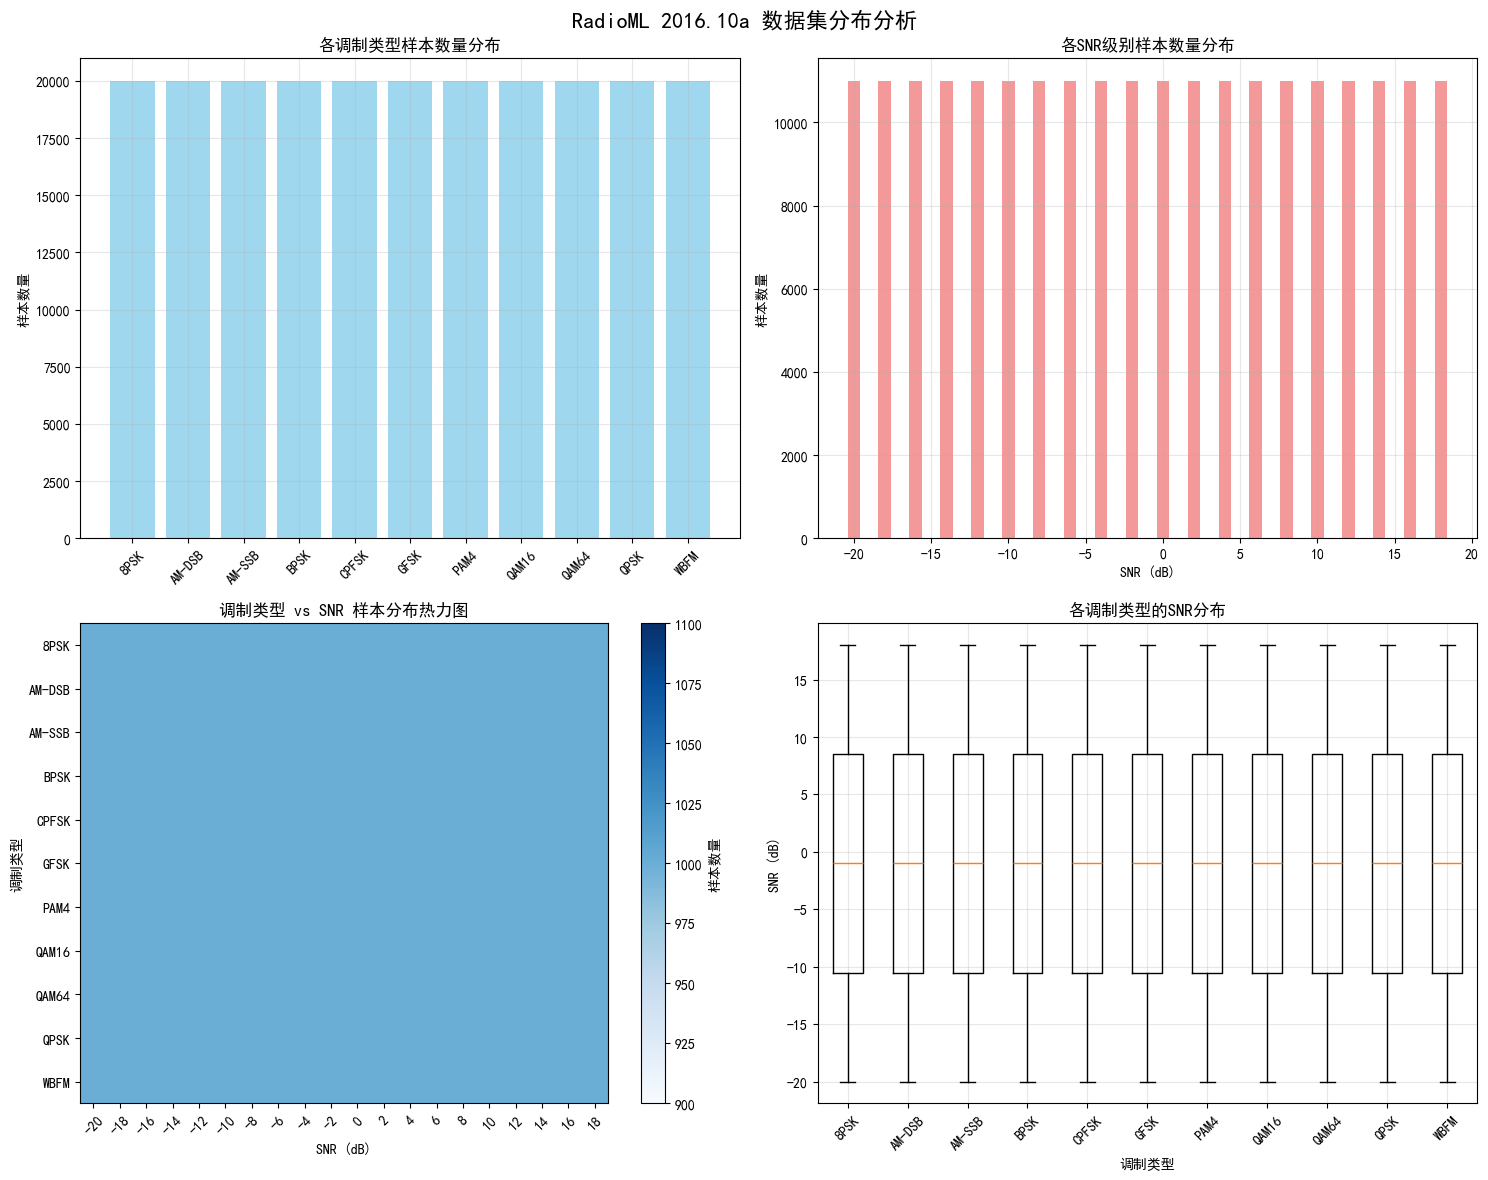

In [5]:
# ÂàÜÂ∏ÉÂèØËßÜÂåñ
if dataset is not None:
    # 1. Ë∞ÉÂà∂Á±ªÂûãÂàÜÂ∏ÉÊü±Áä∂Âõæ
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('RadioML 2016.10a Êï∞ÊçÆÈõÜÂàÜÂ∏ÉÂàÜÊûê', fontsize=16, fontweight='bold')
    
    # Ë∞ÉÂà∂Á±ªÂûãÂàÜÂ∏É
    axes[0, 0].bar(range(len(mod_counts)), mod_counts.values, color='skyblue', alpha=0.8)
    axes[0, 0].set_xticks(range(len(mod_counts)))
    axes[0, 0].set_xticklabels(mod_counts.index, rotation=45)
    axes[0, 0].set_title('ÂêÑË∞ÉÂà∂Á±ªÂûãÊ†∑Êú¨Êï∞ÈáèÂàÜÂ∏É')
    axes[0, 0].set_ylabel('Ê†∑Êú¨Êï∞Èáè')
    axes[0, 0].grid(True, alpha=0.3)
    
    # SNRÂàÜÂ∏É
    axes[0, 1].bar(snr_counts.index, snr_counts.values, color='lightcoral', alpha=0.8)
    axes[0, 1].set_title('ÂêÑSNRÁ∫ßÂà´Ê†∑Êú¨Êï∞ÈáèÂàÜÂ∏É')
    axes[0, 1].set_xlabel('SNR (dB)')
    axes[0, 1].set_ylabel('Ê†∑Êú¨Êï∞Èáè')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Ë∞ÉÂà∂Á±ªÂûãvs SNRÁÉ≠ÂäõÂõæ
    pivot_data = df_dist.pivot(index='Modulation', columns='SNR_dB', values='Samples')
    im = axes[1, 0].imshow(pivot_data.values, cmap='Blues', aspect='auto')
    axes[1, 0].set_xticks(range(len(snrs)))
    axes[1, 0].set_xticklabels([f'{snr}' for snr in snrs], rotation=45)
    axes[1, 0].set_yticks(range(len(mods)))
    axes[1, 0].set_yticklabels(mods)
    axes[1, 0].set_title('Ë∞ÉÂà∂Á±ªÂûã vs SNR Ê†∑Êú¨ÂàÜÂ∏ÉÁÉ≠ÂäõÂõæ')
    axes[1, 0].set_xlabel('SNR (dB)')
    axes[1, 0].set_ylabel('Ë∞ÉÂà∂Á±ªÂûã')
    
    # Ê∑ªÂä†È¢úËâ≤Êù°
    plt.colorbar(im, ax=axes[1, 0], label='Ê†∑Êú¨Êï∞Èáè')
    
    # SNRÂàÜÂ∏ÉÁÆ±Á∫øÂõæ
    snr_data = []
    labels = []
    for mod in mods:
        mod_snrs = df_dist[df_dist['Modulation'] == mod]['SNR_dB'].tolist()
        snr_data.append(mod_snrs)
        labels.append(mod)
    
    axes[1, 1].boxplot(snr_data, labels=labels)
    axes[1, 1].set_title('ÂêÑË∞ÉÂà∂Á±ªÂûãÁöÑSNRÂàÜÂ∏É')
    axes[1, 1].set_xlabel('Ë∞ÉÂà∂Á±ªÂûã')
    axes[1, 1].set_ylabel('SNR (dB)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [6]:
def analyze_signal_statistics(dataset, mod, snr, num_samples=100):
    """ÂàÜÊûêÁâπÂÆöË∞ÉÂà∂Á±ªÂûãÂíåSNR‰∏ãÁöÑ‰ø°Âè∑ÁªüËÆ°ÁâπÂæÅ"""
    key = (mod, snr)
    if key not in dataset:
        return None
    
    # Ëé∑ÂèñÊ†∑Êú¨
    samples = dataset[key][:num_samples]
    
    # ÂàÜÁ¶ªI/QÂàÜÈáè
    i_data = samples[:, 0, :].flatten()
    q_data = samples[:, 1, :].flatten()
    
    # ËÆ°ÁÆóÁªüËÆ°ÁâπÂæÅ
    stats = {
        'I_mean': np.mean(i_data),
        'I_std': np.std(i_data), 
        'I_min': np.min(i_data),
        'I_max': np.max(i_data),
        'Q_mean': np.mean(q_data),
        'Q_std': np.std(q_data),
        'Q_min': np.min(q_data), 
        'Q_max': np.max(q_data),
        'Signal_power': np.mean(i_data**2 + q_data**2),
        'SNR_estimated': snr
    }
    
    return stats

def plot_signal_examples(dataset, modulations, snr_value=18, num_samples=3):
    """ÁªòÂà∂‰ø°Âè∑Á§∫‰æã"""
    fig, axes = plt.subplots(len(modulations), 2, figsize=(15, 4*len(modulations)))
    fig.suptitle(f'‰ø°Âè∑Á§∫‰æã (SNR = {snr_value} dB)', fontsize=16, fontweight='bold')
    
    for i, mod in enumerate(modulations):
        key = (mod, snr_value)
        if key in dataset:
            # Ëé∑ÂèñÂâçÂá†‰∏™Ê†∑Êú¨
            samples = dataset[key][:num_samples]
            
            # Êó∂Âüü‰ø°Âè∑
            axes[i, 0].set_title(f'{mod} - Êó∂Âüü‰ø°Âè∑')
            for j in range(num_samples):
                sample = samples[j]
                i_component = sample[0, :]
                q_component = sample[1, :]
                time_axis = np.arange(len(i_component))
                
                axes[i, 0].plot(time_axis, i_component, alpha=0.7, label=f'I (Ê†∑Êú¨{j+1})' if j == 0 else '')
                axes[i, 0].plot(time_axis, q_component, alpha=0.7, label=f'Q (Ê†∑Êú¨{j+1})' if j == 0 else '')
            
            axes[i, 0].set_xlabel('Êó∂Èó¥ÈááÊ†∑ÁÇπ')
            axes[i, 0].set_ylabel('ÂπÖÂ∫¶')
            axes[i, 0].grid(True, alpha=0.3)
            axes[i, 0].legend()
            
            # ÊòüÂ∫ßÂõæ
            axes[i, 1].set_title(f'{mod} - ÊòüÂ∫ßÂõæ')
            for j in range(num_samples):
                sample = samples[j]
                i_component = sample[0, :]
                q_component = sample[1, :]
                axes[i, 1].scatter(i_component, q_component, alpha=0.6, s=2)
            
            axes[i, 1].set_xlabel('I ÂàÜÈáè')
            axes[i, 1].set_ylabel('Q ÂàÜÈáè')
            axes[i, 1].grid(True, alpha=0.3)
            axes[i, 1].set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

print("‰ø°Âè∑ÂàÜÊûêÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")

‰ø°Âè∑ÂàÜÊûêÂáΩÊï∞ÂÆö‰πâÂÆåÊàê



=== ‰ø°Âè∑Ê≥¢ÂΩ¢ÂíåÊòüÂ∫ßÂõæÂàÜÊûê ===
ÊòæÁ§∫SNR = 18 dB‰∏ãÁöÑ‰ø°Âè∑Á§∫‰æã

ÊòæÁ§∫Ë∞ÉÂà∂Á±ªÂûã: 8PSK, AM-DSB, AM-SSB, BPSK


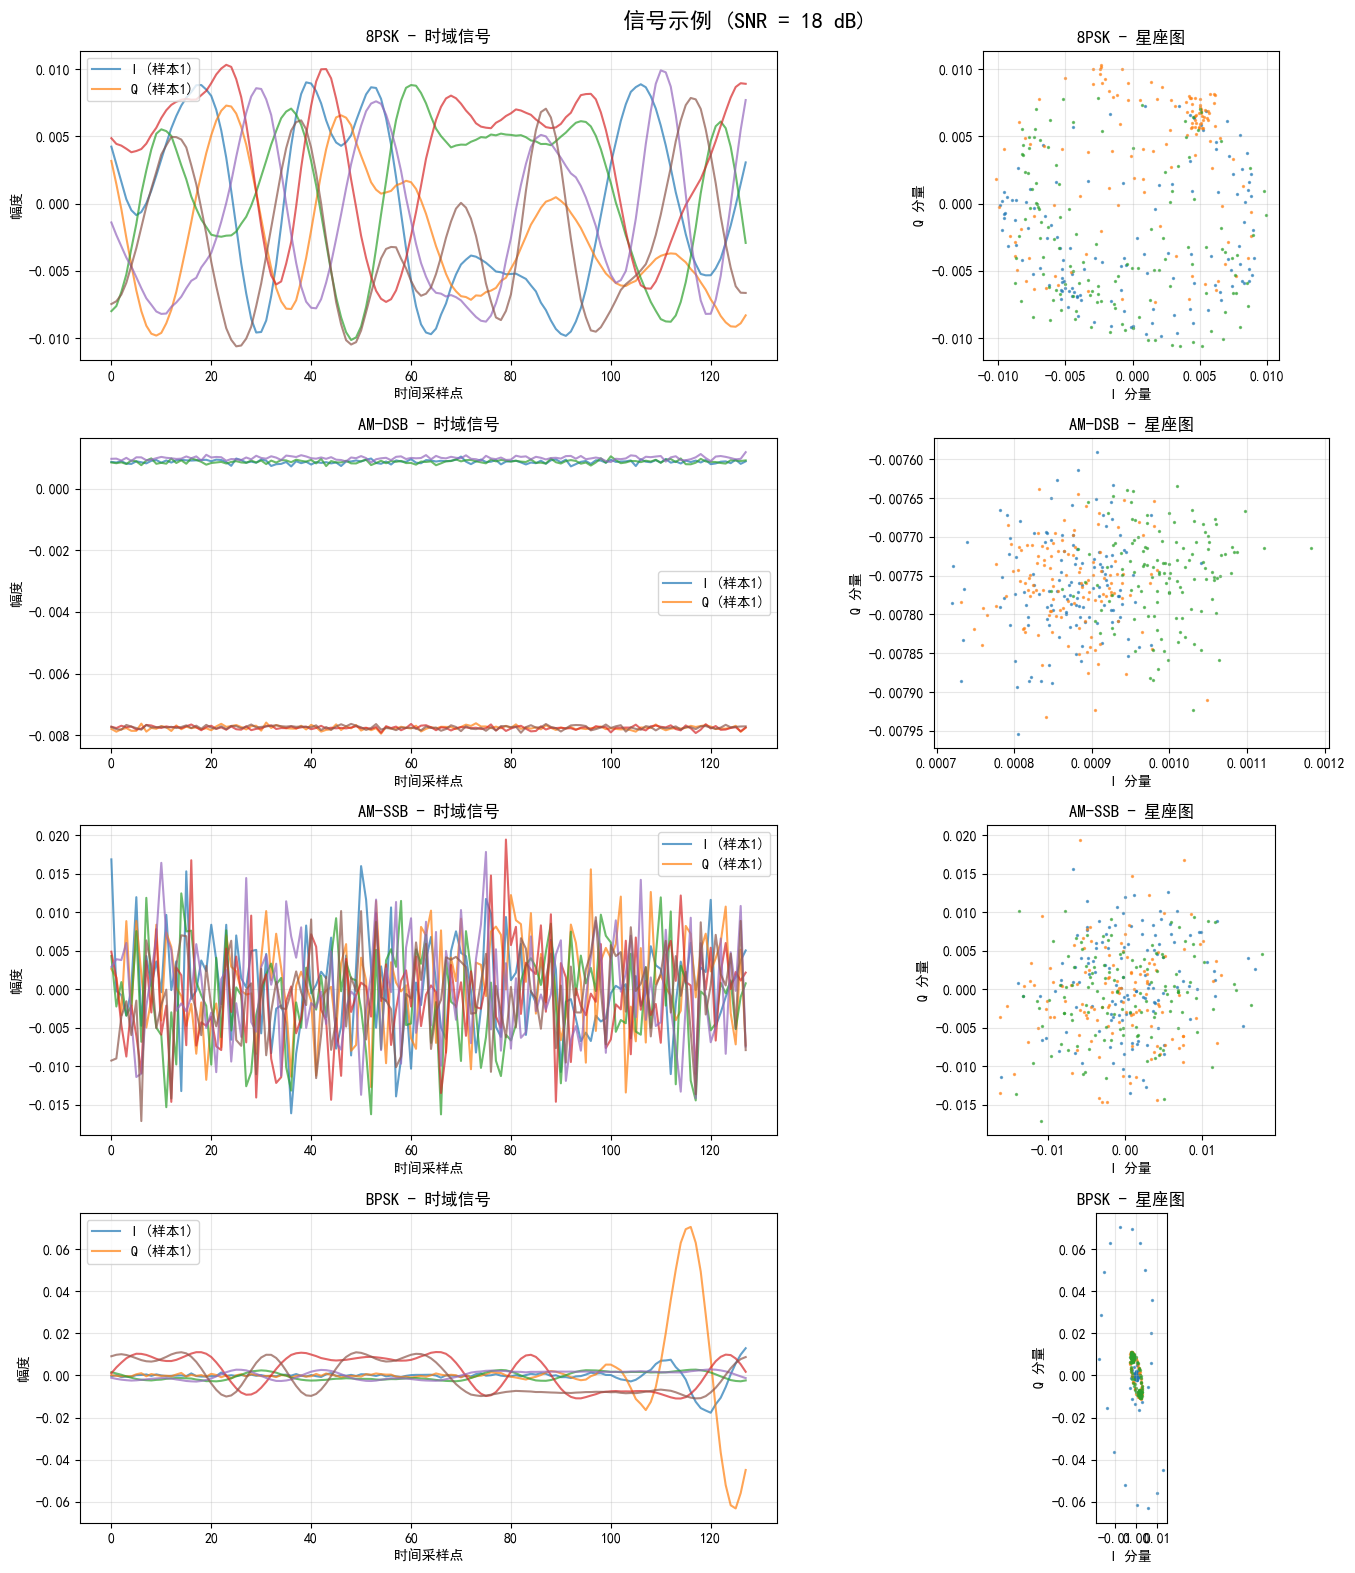


ÊòæÁ§∫Ë∞ÉÂà∂Á±ªÂûã: CPFSK, GFSK, PAM4, QAM16


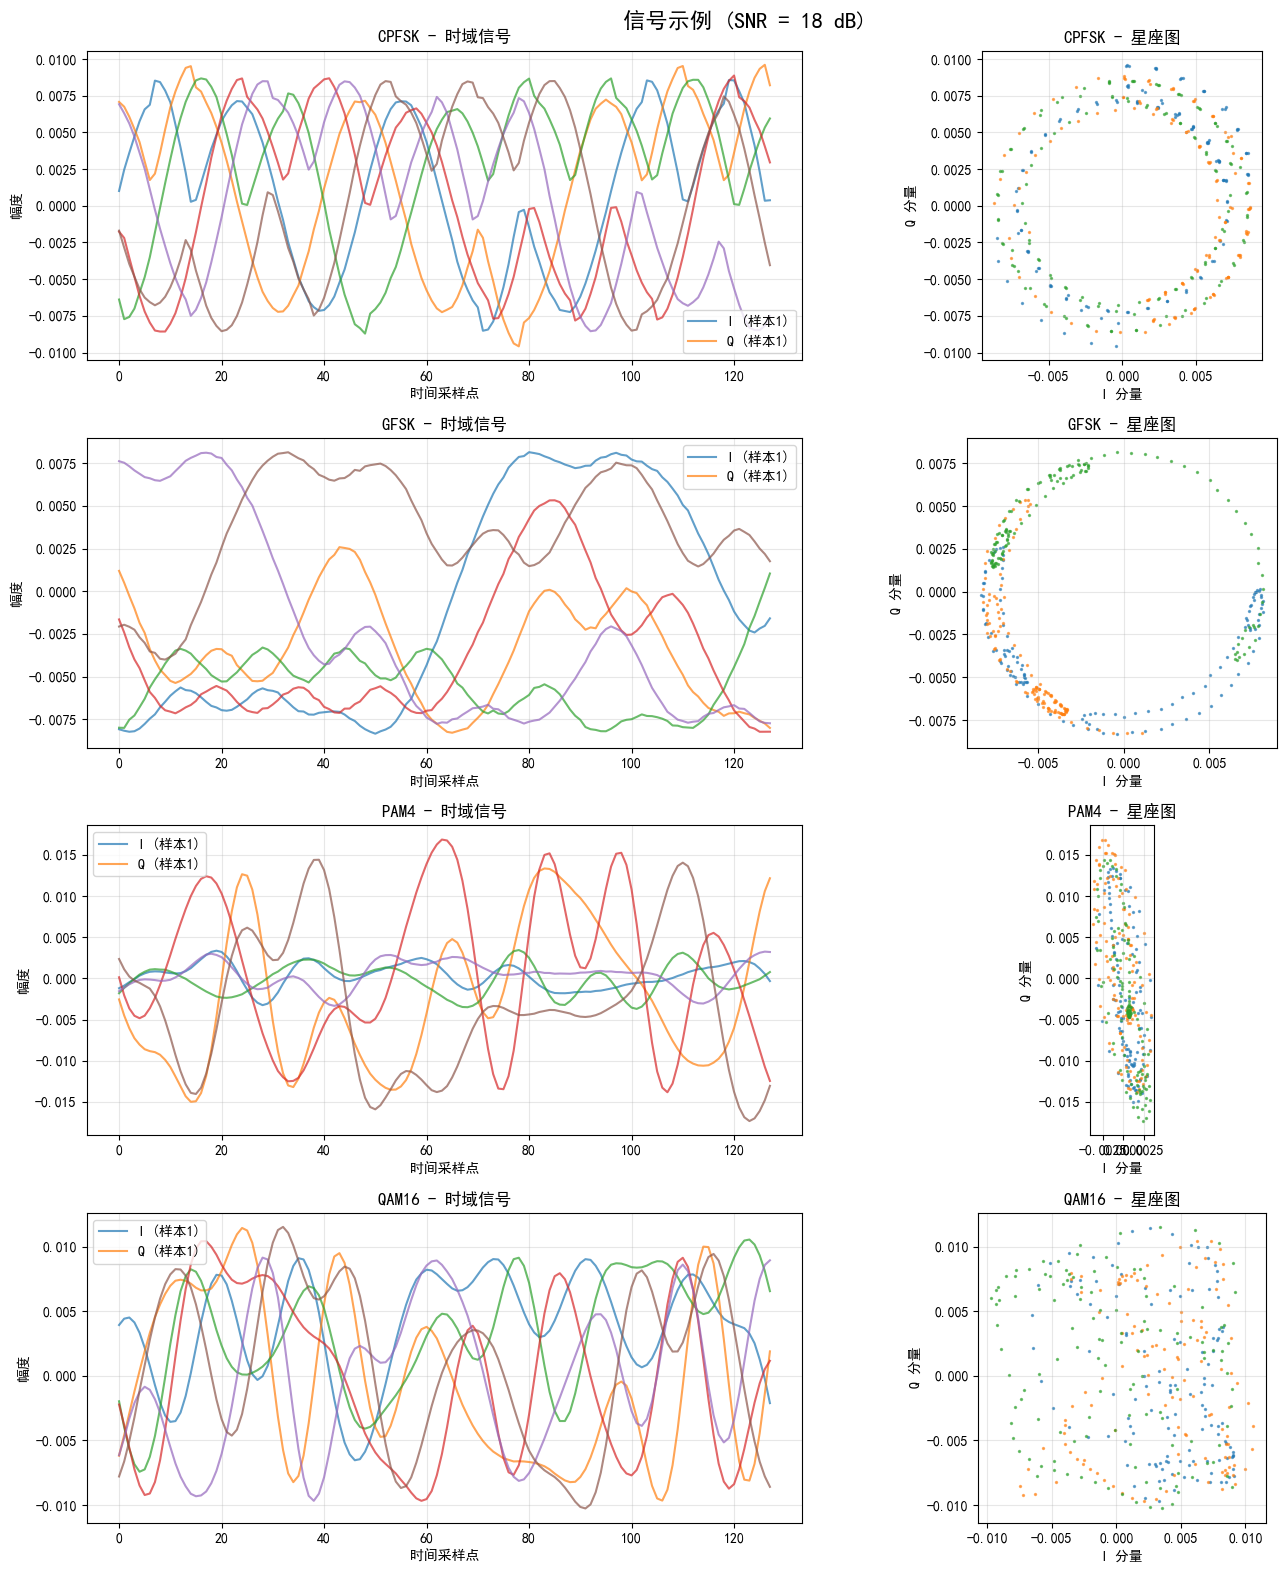


ÊòæÁ§∫Ë∞ÉÂà∂Á±ªÂûã: QAM64, QPSK, WBFM


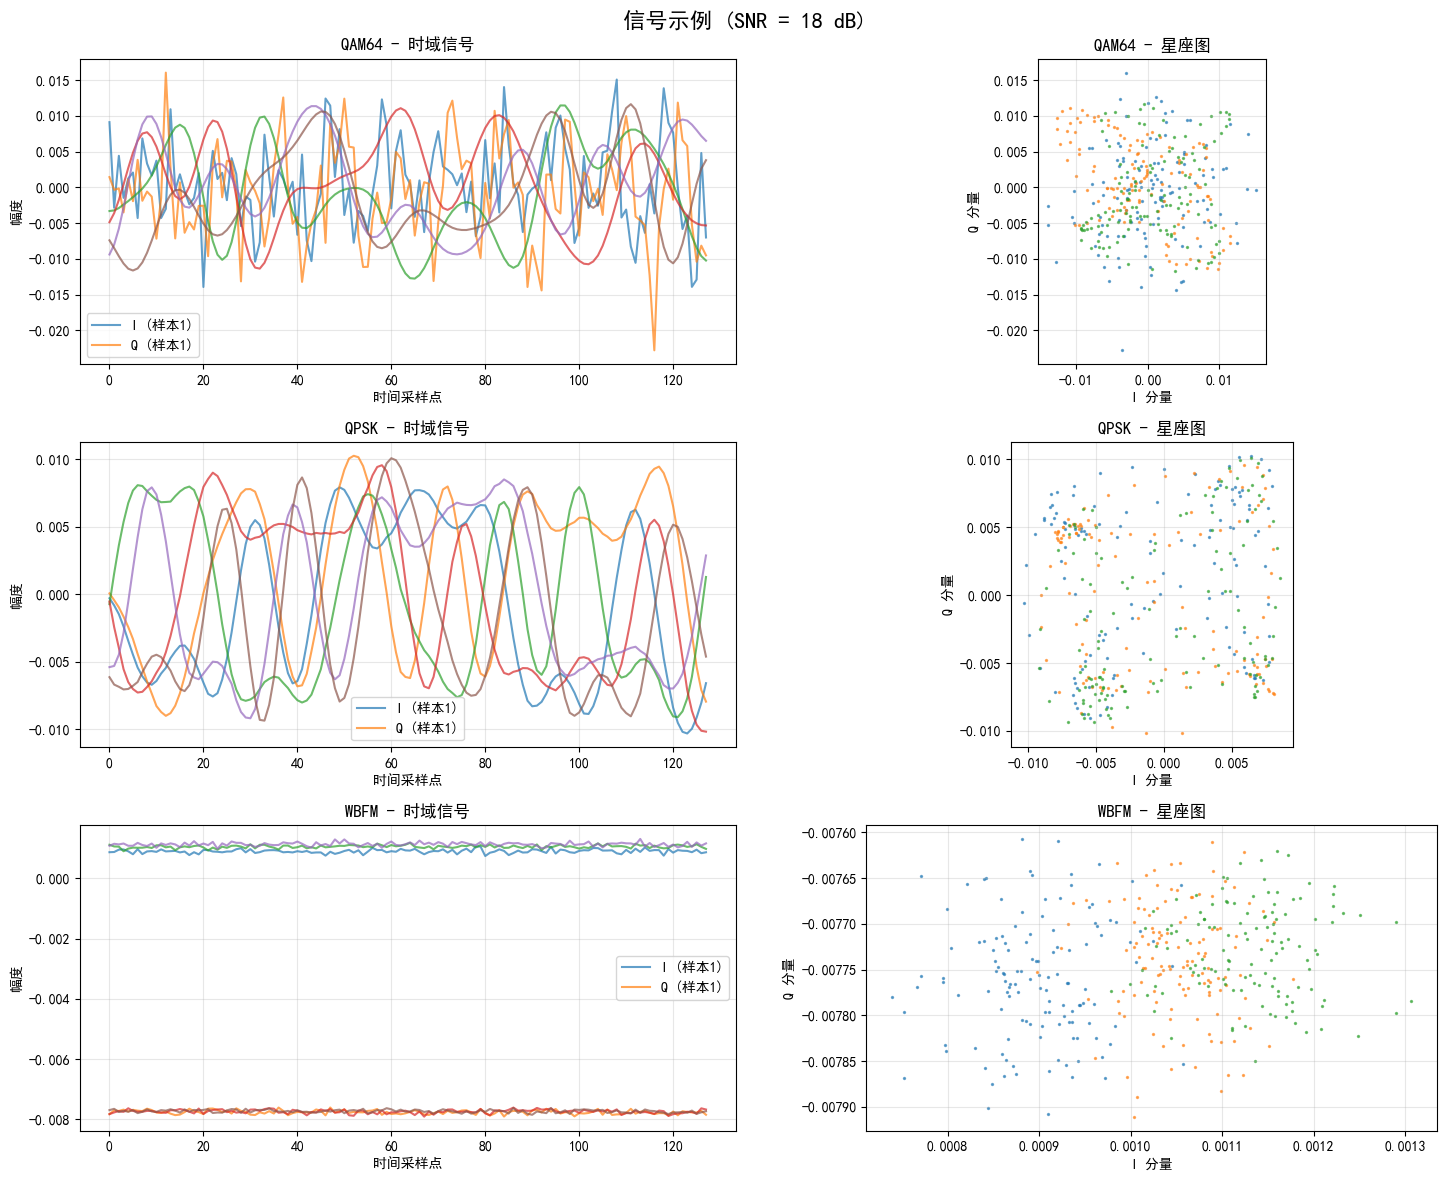

In [7]:
# ÊòæÁ§∫ÊâÄÊúâË∞ÉÂà∂Á±ªÂûãÁöÑ‰ø°Âè∑Á§∫‰æã
if dataset is not None:
    print("\n=== ‰ø°Âè∑Ê≥¢ÂΩ¢ÂíåÊòüÂ∫ßÂõæÂàÜÊûê ===")
    
    # ÈÄâÊã©È´òSNRËøõË°åÊ∏ÖÊô∞ÊòæÁ§∫
    display_snr = 18
    print(f"ÊòæÁ§∫SNR = {display_snr} dB‰∏ãÁöÑ‰ø°Âè∑Á§∫‰æã\n")
    
    # ÂàÜÊâπÊòæÁ§∫Ë∞ÉÂà∂Á±ªÂûãÔºàÈÅøÂÖçÂõæÂ§™Â§ßÔºâ
    batch_size = 4
    for i in range(0, len(mods), batch_size):
        batch_mods = mods[i:i+batch_size]
        print(f"ÊòæÁ§∫Ë∞ÉÂà∂Á±ªÂûã: {', '.join(batch_mods)}")
        plot_signal_examples(dataset, batch_mods, display_snr)
        print()

In [8]:
# ‰ø°Âè∑ÁªüËÆ°ÁâπÂæÅÂàÜÊûê
if dataset is not None:
    print("\n=== ‰ø°Âè∑ÁªüËÆ°ÁâπÂæÅÂàÜÊûê ===")
    
    # ÈÄâÊã©Âá†‰∏™‰ª£Ë°®ÊÄßÁöÑSNRÂÄºËøõË°åÂàÜÊûê
    analysis_snrs = [-10, 0, 10, 18]
    
    # ÂàõÂª∫ÁªüËÆ°ÁâπÂæÅDataFrame
    stats_data = []
    
    for mod in mods:
        for snr in analysis_snrs:
            stats = analyze_signal_statistics(dataset, mod, snr)
            if stats:
                stats['Modulation'] = mod
                stats['SNR'] = snr
                stats_data.append(stats)
    
    df_stats = pd.DataFrame(stats_data)
    
    # ÊòæÁ§∫ÁªüËÆ°ÊëòË¶Å
    print("\n‰ø°Âè∑ÂäüÁéáÁªüËÆ° (ÊåâË∞ÉÂà∂Á±ªÂûã):")
    power_by_mod = df_stats.groupby('Modulation')['Signal_power'].agg(['mean', 'std', 'min', 'max'])
    print(power_by_mod.round(4))
    
    print("\n‰ø°Âè∑ÂäüÁéáÁªüËÆ° (ÊåâSNR):")
    power_by_snr = df_stats.groupby('SNR')['Signal_power'].agg(['mean', 'std', 'min', 'max'])
    print(power_by_snr.round(4))


=== ‰ø°Âè∑ÁªüËÆ°ÁâπÂæÅÂàÜÊûê ===

‰ø°Âè∑ÂäüÁéáÁªüËÆ° (ÊåâË∞ÉÂà∂Á±ªÂûã):
              mean  std     min     max
Modulation                             
8PSK        0.0001  0.0  0.0001  0.0001
AM-DSB      0.0001  0.0  0.0001  0.0001
AM-SSB      0.0001  0.0  0.0001  0.0001
BPSK        0.0001  0.0  0.0001  0.0001
CPFSK       0.0001  0.0  0.0001  0.0001
GFSK        0.0001  0.0  0.0001  0.0001
PAM4        0.0001  0.0  0.0001  0.0001
QAM16       0.0001  0.0  0.0001  0.0001
QAM64       0.0001  0.0  0.0001  0.0001
QPSK        0.0001  0.0  0.0001  0.0001
WBFM        0.0001  0.0  0.0001  0.0001

‰ø°Âè∑ÂäüÁéáÁªüËÆ° (ÊåâSNR):
       mean  std     min     max
SNR                             
-10  0.0001  0.0  0.0001  0.0001
 0   0.0001  0.0  0.0001  0.0001
 10  0.0001  0.0  0.0001  0.0001
 18  0.0001  0.0  0.0001  0.0001


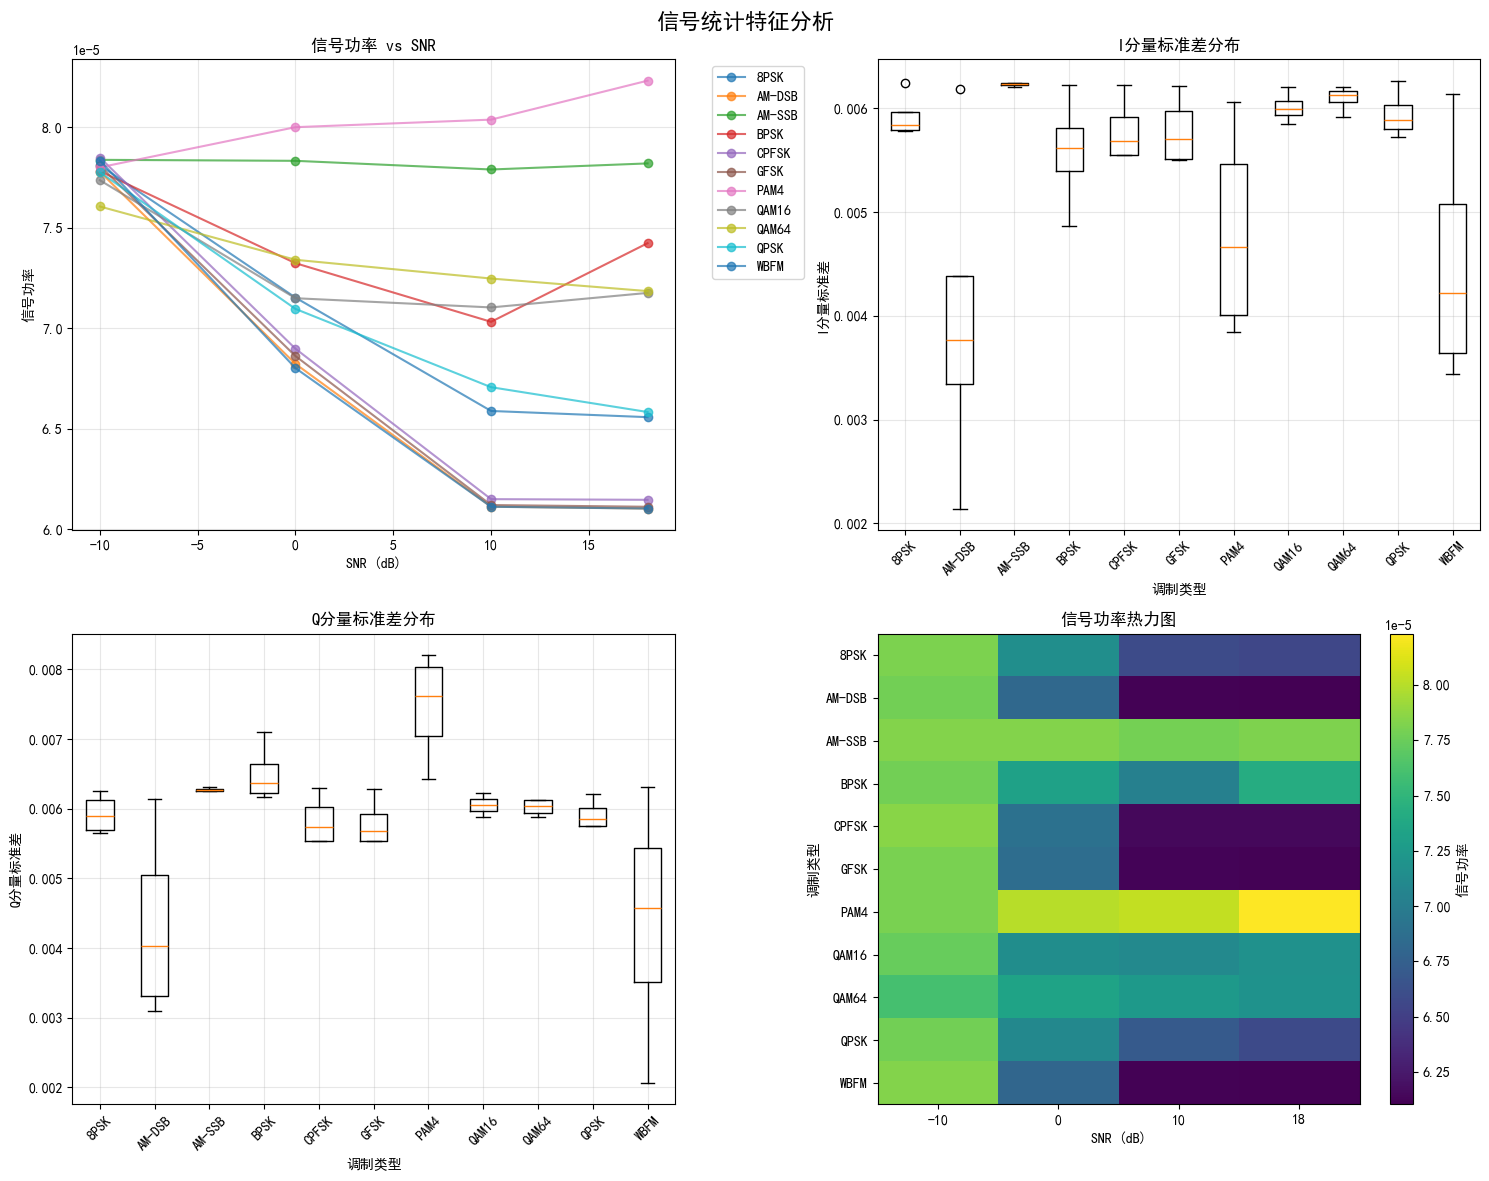

In [9]:
# ÁªüËÆ°ÁâπÂæÅÂèØËßÜÂåñ
if dataset is not None and len(stats_data) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('‰ø°Âè∑ÁªüËÆ°ÁâπÂæÅÂàÜÊûê', fontsize=16, fontweight='bold')
    
    # 1. ‰ø°Âè∑ÂäüÁéá vs SNR
    for mod in mods:
        mod_data = df_stats[df_stats['Modulation'] == mod]
        axes[0, 0].plot(mod_data['SNR'], mod_data['Signal_power'], 'o-', label=mod, alpha=0.7)
    
    axes[0, 0].set_title('‰ø°Âè∑ÂäüÁéá vs SNR')
    axes[0, 0].set_xlabel('SNR (dB)')
    axes[0, 0].set_ylabel('‰ø°Âè∑ÂäüÁéá')
    axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. IÂàÜÈáèÊ†áÂáÜÂ∑ÆÂàÜÂ∏É
    axes[0, 1].boxplot([df_stats[df_stats['Modulation'] == mod]['I_std'].values for mod in mods], 
                       labels=mods)
    axes[0, 1].set_title('IÂàÜÈáèÊ†áÂáÜÂ∑ÆÂàÜÂ∏É')
    axes[0, 1].set_xlabel('Ë∞ÉÂà∂Á±ªÂûã')
    axes[0, 1].set_ylabel('IÂàÜÈáèÊ†áÂáÜÂ∑Æ')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. QÂàÜÈáèÊ†áÂáÜÂ∑ÆÂàÜÂ∏É  
    axes[1, 0].boxplot([df_stats[df_stats['Modulation'] == mod]['Q_std'].values for mod in mods],
                       labels=mods)
    axes[1, 0].set_title('QÂàÜÈáèÊ†áÂáÜÂ∑ÆÂàÜÂ∏É')
    axes[1, 0].set_xlabel('Ë∞ÉÂà∂Á±ªÂûã')
    axes[1, 0].set_ylabel('QÂàÜÈáèÊ†áÂáÜÂ∑Æ')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. ‰ø°Âè∑ÂäüÁéáÁÉ≠ÂäõÂõæ
    power_pivot = df_stats.pivot(index='Modulation', columns='SNR', values='Signal_power')
    im = axes[1, 1].imshow(power_pivot.values, cmap='viridis', aspect='auto')
    axes[1, 1].set_xticks(range(len(analysis_snrs)))
    axes[1, 1].set_xticklabels([f'{snr}' for snr in analysis_snrs])
    axes[1, 1].set_yticks(range(len(mods)))
    axes[1, 1].set_yticklabels(mods)
    axes[1, 1].set_title('‰ø°Âè∑ÂäüÁéáÁÉ≠ÂäõÂõæ')
    axes[1, 1].set_xlabel('SNR (dB)')
    axes[1, 1].set_ylabel('Ë∞ÉÂà∂Á±ªÂûã')
    plt.colorbar(im, ax=axes[1, 1], label='‰ø°Âè∑ÂäüÁéá')
    
    plt.tight_layout()
    plt.show()


=== SNRÂØπ‰ø°Âè∑Ë¥®ÈáèÁöÑÂΩ±ÂìçÂàÜÊûê ===
ÂàÜÊûêË∞ÉÂà∂Á±ªÂûã: QAM16


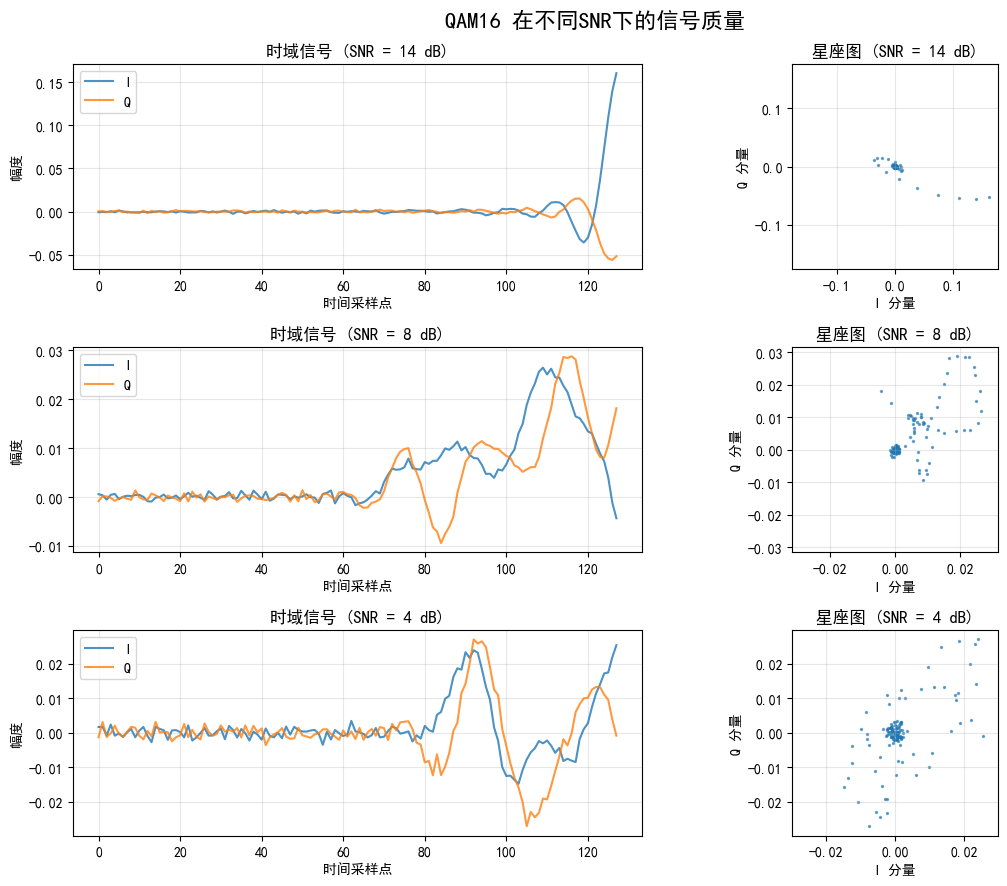

In [16]:
# SNRÂØπ‰ø°Âè∑Ë¥®ÈáèÁöÑÂΩ±ÂìçÂàÜÊûê
if dataset is not None:
    print("\n=== SNRÂØπ‰ø°Âè∑Ë¥®ÈáèÁöÑÂΩ±ÂìçÂàÜÊûê ===")
    
    # ÈÄâÊã©‰∏Ä‰∏™‰ª£Ë°®ÊÄßÁöÑË∞ÉÂà∂Á±ªÂûãËøõË°åËØ¶ÁªÜÂàÜÊûê
    target_mod = 'QAM16'  # ÂõõÁõ∏ÁßªÈîÆÊéßÔºåÊØîËæÉÂÖ∏Âûã
    print(f"ÂàÜÊûêË∞ÉÂà∂Á±ªÂûã: {target_mod}")
    
    # ÈÄâÊã©Âá†‰∏™ÂÖ≥ÈîÆSNRÂÄº
    # snr_levels = range(18, 0, -2)
    snr_levels = [14, 8, 4]

    fig, axes = plt.subplots(len(snr_levels), 2, figsize=(12, 3*len(snr_levels)))
    fig.suptitle(f'{target_mod} Âú®‰∏çÂêåSNR‰∏ãÁöÑ‰ø°Âè∑Ë¥®Èáè', fontsize=16, fontweight='bold')
    
    for i, snr in enumerate(snr_levels):
        key = (target_mod, snr)
        if key in dataset:
            # Ëé∑ÂèñÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨
            sample = dataset[key][0]
            i_component = sample[0, :]
            q_component = sample[1, :]
            time_axis = np.arange(len(i_component))
            
            # Êó∂Âüü‰ø°Âè∑
            axes[i, 0].plot(time_axis, i_component, label='I', alpha=0.8)
            axes[i, 0].plot(time_axis, q_component, label='Q', alpha=0.8)
            axes[i, 0].set_title(f'Êó∂Âüü‰ø°Âè∑ (SNR = {snr} dB)')
            axes[i, 0].set_xlabel('Êó∂Èó¥ÈááÊ†∑ÁÇπ')
            axes[i, 0].set_ylabel('ÂπÖÂ∫¶')
            axes[i, 0].legend()
            axes[i, 0].grid(True, alpha=0.3)
            
            # ÊòüÂ∫ßÂõæ
            axes[i, 1].scatter(i_component, q_component, alpha=0.6, s=2)
            axes[i, 1].set_title(f'ÊòüÂ∫ßÂõæ (SNR = {snr} dB)')
            axes[i, 1].set_xlabel('I ÂàÜÈáè')
            axes[i, 1].set_ylabel('Q ÂàÜÈáè')
            axes[i, 1].grid(True, alpha=0.3)
            axes[i, 1].set_aspect('equal')
            
            # ËÆæÁΩÆÂêàÁêÜÁöÑÂùêÊ†áËΩ¥ËåÉÂõ¥
            max_val = max(np.max(np.abs(i_component)), np.max(np.abs(q_component)))
            axes[i, 1].set_xlim([-max_val*1.1, max_val*1.1])
            axes[i, 1].set_ylim([-max_val*1.1, max_val*1.1])
    
    plt.tight_layout()
    plt.show()


=== È¢ëÂüüÁâπÂæÅÂàÜÊûê ===
ÂàÜÊûêË∞ÉÂà∂Á±ªÂûã: BPSK, QPSK, 8PSK, QAM16, QAM64


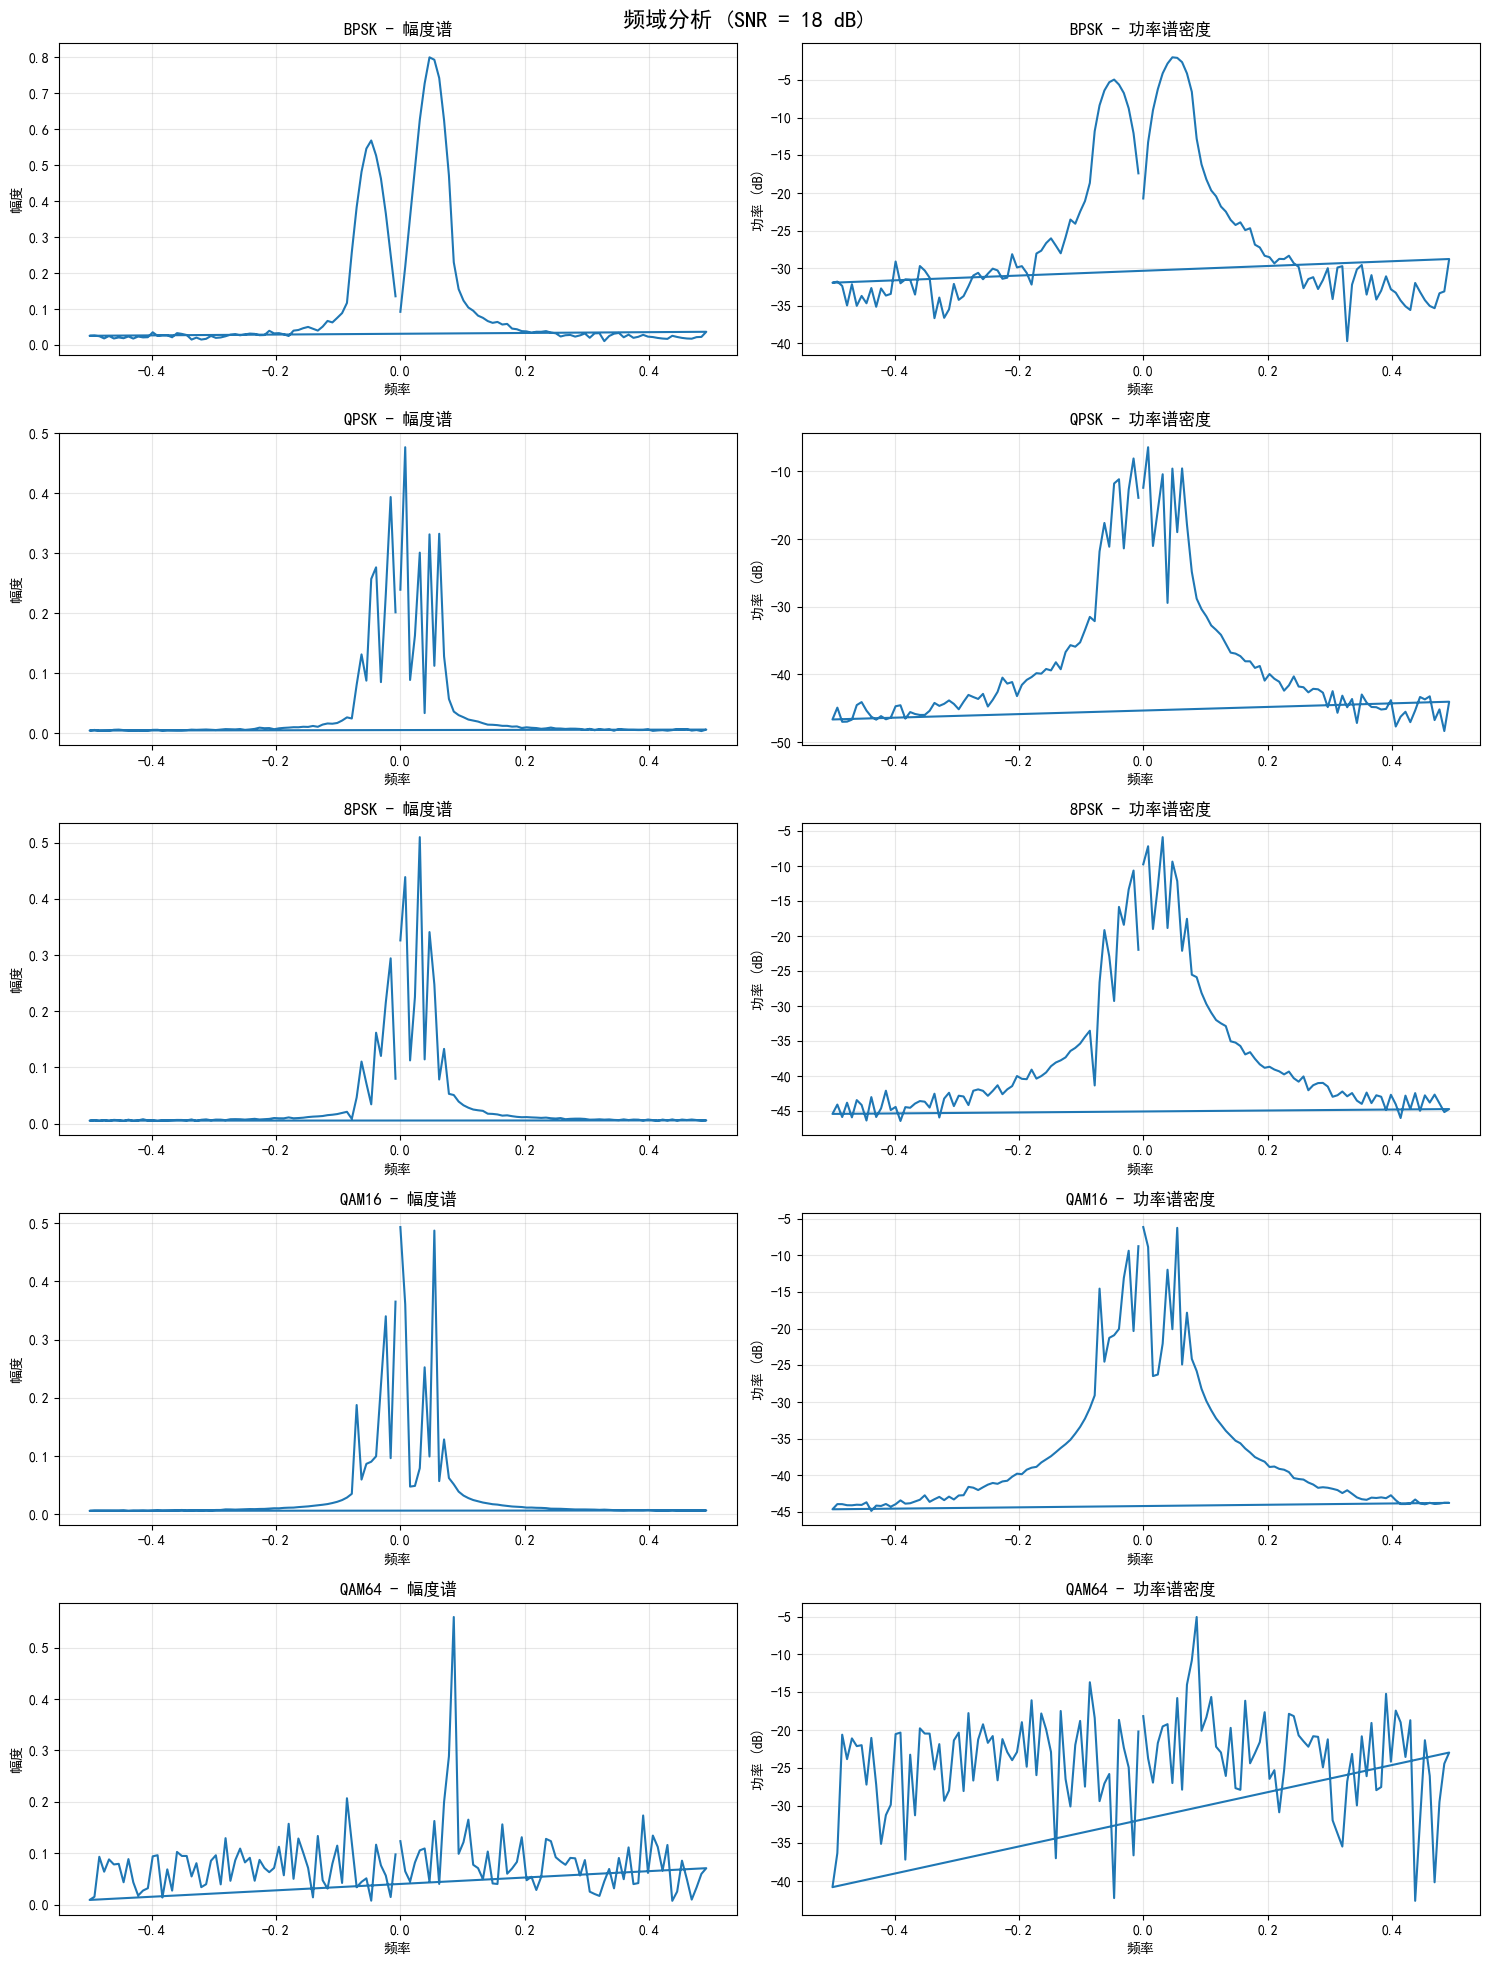

In [11]:
# È¢ëÂüüÂàÜÊûê
def plot_frequency_analysis(dataset, modulations, snr_value=18, sample_rate=1.0):
    """ÁªòÂà∂È¢ëÂüüÂàÜÊûêÂõæ"""
    fig, axes = plt.subplots(len(modulations), 2, figsize=(15, 4*len(modulations)))
    fig.suptitle(f'È¢ëÂüüÂàÜÊûê (SNR = {snr_value} dB)', fontsize=16, fontweight='bold')
    
    for i, mod in enumerate(modulations):
        key = (mod, snr_value)
        if key in dataset:
            # Ëé∑ÂèñÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨
            sample = dataset[key][0]
            i_component = sample[0, :]
            q_component = sample[1, :]
            
            # Â§ç‰ø°Âè∑
            complex_signal = i_component + 1j * q_component
            
            # FFTÂàÜÊûê
            fft_result = np.fft.fft(complex_signal)
            freqs = np.fft.fftfreq(len(complex_signal), d=1/sample_rate)
            
            # ÂäüÁéáË∞±ÂØÜÂ∫¶
            psd = np.abs(fft_result) ** 2
            
            # ÂπÖÂ∫¶Ë∞±
            axes[i, 0].plot(freqs, np.abs(fft_result))
            axes[i, 0].set_title(f'{mod} - ÂπÖÂ∫¶Ë∞±')
            axes[i, 0].set_xlabel('È¢ëÁéá')
            axes[i, 0].set_ylabel('ÂπÖÂ∫¶')
            axes[i, 0].grid(True, alpha=0.3)
            
            # ÂäüÁéáË∞±ÂØÜÂ∫¶
            axes[i, 1].plot(freqs, 10*np.log10(psd + 1e-12))  # Ê∑ªÂä†Â∞èÂÄºÈÅøÂÖçlog(0)
            axes[i, 1].set_title(f'{mod} - ÂäüÁéáË∞±ÂØÜÂ∫¶')
            axes[i, 1].set_xlabel('È¢ëÁéá')
            axes[i, 1].set_ylabel('ÂäüÁéá (dB)')
            axes[i, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if dataset is not None:
    print("\n=== È¢ëÂüüÁâπÂæÅÂàÜÊûê ===")
    
    # ÈÄâÊã©Âá†‰∏™‰ª£Ë°®ÊÄßÁöÑË∞ÉÂà∂Á±ªÂûãËøõË°åÈ¢ëÂüüÂàÜÊûê
    freq_analysis_mods = ['BPSK', 'QPSK', '8PSK', 'QAM16', 'QAM64']
    available_mods = [mod for mod in freq_analysis_mods if mod in mods]
    
    if available_mods:
        print(f"ÂàÜÊûêË∞ÉÂà∂Á±ªÂûã: {', '.join(available_mods)}")
        plot_frequency_analysis(dataset, available_mods, snr_value=18)
    else:
        print("Ê≤°ÊúâÊâæÂà∞ÊåáÂÆöÁöÑË∞ÉÂà∂Á±ªÂûãÁî®‰∫éÈ¢ëÂüüÂàÜÊûê")

In [12]:
# Êï∞ÊçÆË¥®ÈáèËØÑ‰º∞
if dataset is not None:
    print("\n=== Êï∞ÊçÆË¥®ÈáèËØÑ‰º∞ ===")
    
    # Ê£ÄÊü•Êï∞ÊçÆÂÆåÊï¥ÊÄß
    missing_keys = []
    for mod in mods:
        for snr in snrs:
            key = (mod, snr)
            if key not in dataset:
                missing_keys.append(key)
    
    print(f"Áº∫Â§±ÁöÑÈîÆÂÄºÂØπÊï∞Èáè: {len(missing_keys)}")
    if missing_keys:
        print("Áº∫Â§±ÁöÑÈîÆÂÄºÂØπ:")
        for key in missing_keys[:10]:  # Âè™ÊòæÁ§∫Ââç10‰∏™
            print(f"  {key}")
        if len(missing_keys) > 10:
            print(f"  ... ËøòÊúâ {len(missing_keys) - 10} ‰∏™")
    
    # Ê£ÄÊü•Ê†∑Êú¨Êï∞Èáè‰∏ÄËá¥ÊÄß
    sample_counts = {}
    for key in dataset.keys():
        count = len(dataset[key])
        if count not in sample_counts:
            sample_counts[count] = 0
        sample_counts[count] += 1
    
    print(f"\nÊ†∑Êú¨Êï∞ÈáèÂàÜÂ∏É:")
    for count, num_keys in sorted(sample_counts.items()):
        print(f"  {count} ‰∏™Ê†∑Êú¨: {num_keys} ‰∏™ÈîÆÂÄºÂØπ")
    
    # Ê£ÄÊü•Êï∞ÊçÆËåÉÂõ¥
    print("\nÊï∞ÊçÆËåÉÂõ¥Ê£ÄÊü•:")
    all_i_values = []
    all_q_values = []
    
    # ÈöèÊú∫ÊäΩÊ†∑Ê£ÄÊü•ÔºàÈÅøÂÖçÂÜÖÂ≠òÈóÆÈ¢òÔºâ
    sample_keys = list(dataset.keys())[:50]  # Ê£ÄÊü•Ââç50‰∏™ÈîÆ
    
    for key in sample_keys:
        samples = dataset[key][:10]  # ÊØè‰∏™ÈîÆÊ£ÄÊü•Ââç10‰∏™Ê†∑Êú¨
        for sample in samples:
            all_i_values.extend(sample[0, :])
            all_q_values.extend(sample[1, :])
    
    print(f"IÂàÜÈáèËåÉÂõ¥: [{np.min(all_i_values):.4f}, {np.max(all_i_values):.4f}]")
    print(f"QÂàÜÈáèËåÉÂõ¥: [{np.min(all_q_values):.4f}, {np.max(all_q_values):.4f}]")
    print(f"IÂàÜÈáèÂùáÂÄº: {np.mean(all_i_values):.4f} ¬± {np.std(all_i_values):.4f}")
    print(f"QÂàÜÈáèÂùáÂÄº: {np.mean(all_q_values):.4f} ¬± {np.std(all_q_values):.4f}")
    
    # Êï∞ÊçÆË¥®ÈáèËØÑÂàÜ
    completeness_score = 1.0 - len(missing_keys) / (len(mods) * len(snrs))
    consistency_score = 1.0 if len(sample_counts) == 1 else 0.8
    
    print(f"\nÊï∞ÊçÆË¥®ÈáèËØÑÂàÜ:")
    print(f"  ÂÆåÊï¥ÊÄß: {completeness_score:.2%}")
    print(f"  ‰∏ÄËá¥ÊÄß: {consistency_score:.2%}")
    print(f"  ÊÄª‰ΩìËØÑÂàÜ: {(completeness_score + consistency_score) / 2:.2%}")


=== Êï∞ÊçÆË¥®ÈáèËØÑ‰º∞ ===
Áº∫Â§±ÁöÑÈîÆÂÄºÂØπÊï∞Èáè: 0

Ê†∑Êú¨Êï∞ÈáèÂàÜÂ∏É:
  1000 ‰∏™Ê†∑Êú¨: 220 ‰∏™ÈîÆÂÄºÂØπ

Êï∞ÊçÆËåÉÂõ¥Ê£ÄÊü•:
IÂàÜÈáèËåÉÂõ¥: [-0.0263, 0.0310]
QÂàÜÈáèËåÉÂõ¥: [-0.0250, 0.0280]
IÂàÜÈáèÂùáÂÄº: -0.0000 ¬± 0.0054
QÂàÜÈáèÂùáÂÄº: -0.0011 ¬± 0.0065

Êï∞ÊçÆË¥®ÈáèËØÑÂàÜ:
  ÂÆåÊï¥ÊÄß: 100.00%
  ‰∏ÄËá¥ÊÄß: 100.00%
  ÊÄª‰ΩìËØÑÂàÜ: 100.00%



=== 11ÁßçË∞ÉÂà∂Á±ªÂûãÊòüÂ∫ßÂõæÂØπÊØîÂàÜÊûê ===

‚úì 8PSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì AM-DSB: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì AM-SSB: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì 8PSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì AM-DSB: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì AM-SSB: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì BPSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì CPFSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì GFSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì BPSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì CPFSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì GFSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì PAM4: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì QAM16: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì QAM64: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì PAM4: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì QAM16: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì QAM64: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì QPSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì WBFM: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì QPSK: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ
‚úì WBFM: 100‰∏™Ê†∑Êú¨, 12800‰∏™Êï∞ÊçÆÁÇπ


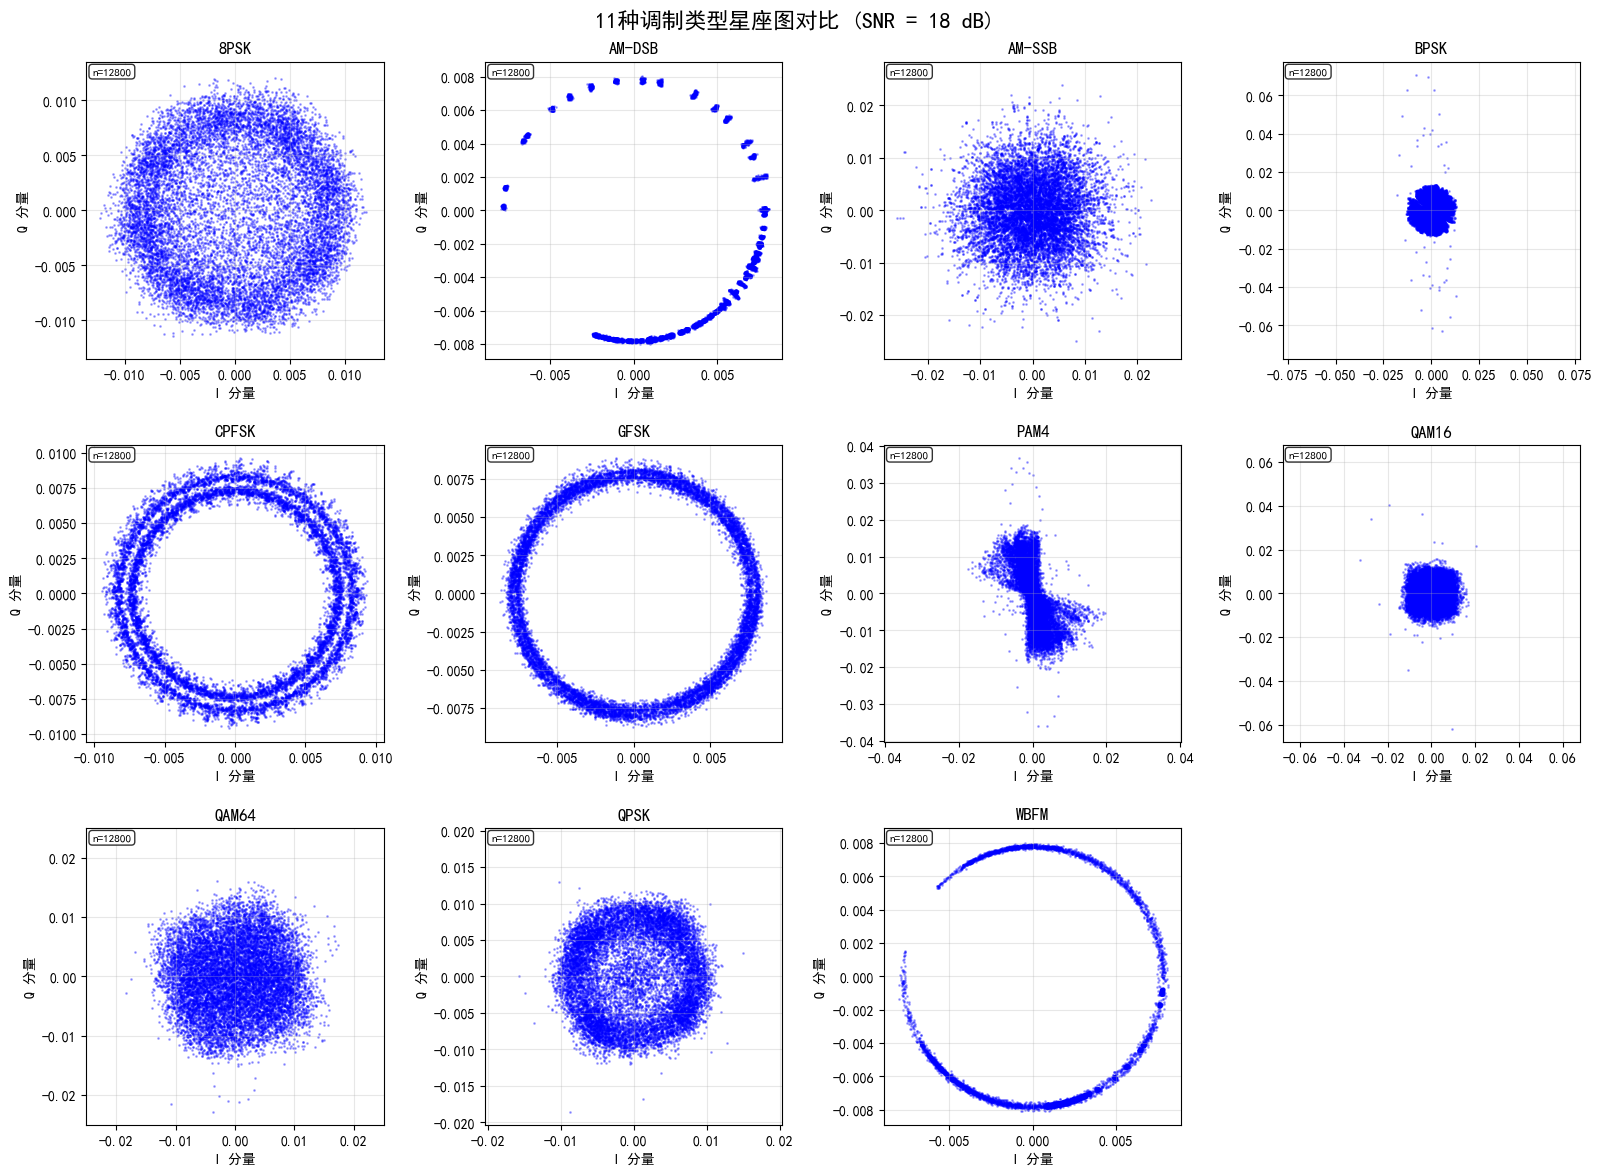


ÁªòÂà∂ÂÆåÊàêÔºÅÊòæÁ§∫‰∫Ü11ÁßçË∞ÉÂà∂Á±ªÂûãÂú®SNR=18dB‰∏ãÁöÑÊòüÂ∫ßÂõæ
ÊØè‰∏™Ë∞ÉÂà∂Á±ªÂûã‰ΩøÁî®100‰∏™Ê†∑Êú¨ÔºåÊØè‰∏™Ê†∑Êú¨ÂåÖÂê´128‰∏™Â§çÊï∞ÈááÊ†∑ÁÇπ


In [18]:
# Ë∞ÉÂà∂Á±ªÂûãÊòüÂ∫ßÂõæÂØπÊØîÂàÜÊûê
if dataset is not None:
    print("\n=== 11ÁßçË∞ÉÂà∂Á±ªÂûãÊòüÂ∫ßÂõæÂØπÊØîÂàÜÊûê ===\n")
    
    # ÂèÇÊï∞ËÆæÁΩÆ
    snr_value = 18  # ÈÄâÊã©È´òSNR‰ª•Ëé∑ÂæóÊ∏ÖÊô∞ÁöÑÊòüÂ∫ßÂõæ
    num_samples = 100  # ÊØè‰∏™Ë∞ÉÂà∂Á±ªÂûãÈÄâÂèñ100Êù°Êï∞ÊçÆ
    
    # ÂàõÂª∫3x4ÁöÑÂ≠êÂõæÁΩëÊ†ºÔºà11‰∏™Ë∞ÉÂà∂Á±ªÂûã + 1‰∏™Á©∫‰ΩçÔºâ
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    fig.suptitle(f'11ÁßçË∞ÉÂà∂Á±ªÂûãÊòüÂ∫ßÂõæÂØπÊØî (SNR = {snr_value} dB)', 
                 fontsize=16, fontweight='bold')
    
    # Â∞ÜaxesÂ±ïÂπ≥‰∏∫‰∏ÄÁª¥Êï∞ÁªÑ‰æø‰∫éÁ¥¢Âºï
    axes_flat = axes.flatten()
    
    for i, mod in enumerate(mods):
        if i < len(axes_flat):  # Á°Æ‰øù‰∏çË∂ÖÂá∫Â≠êÂõæÊï∞Èáè
            key = (mod, snr_value)
            
            if key in dataset:
                # Ëé∑ÂèñÊåáÂÆöÊï∞ÈáèÁöÑÊ†∑Êú¨
                samples = dataset[key][:num_samples]
                
                # ÊèêÂèñÊâÄÊúâÊ†∑Êú¨ÁöÑIÂíåQÂàÜÈáè
                all_i = []
                all_q = []
                
                for sample in samples:
                    i_component = sample[0, :]
                    q_component = sample[1, :]
                    all_i.extend(i_component)
                    all_q.extend(q_component)
                
                # ÁªòÂà∂ÊòüÂ∫ßÂõæ
                axes_flat[i].scatter(all_i, all_q, alpha=0.3, s=1, c='blue')
                axes_flat[i].set_title(f'{mod}', fontsize=12, fontweight='bold')
                axes_flat[i].set_xlabel('I ÂàÜÈáè', fontsize=10)
                axes_flat[i].set_ylabel('Q ÂàÜÈáè', fontsize=10)
                axes_flat[i].grid(True, alpha=0.3)
                axes_flat[i].set_aspect('equal')
                
                # ËÆæÁΩÆÂêàÁêÜÁöÑÂùêÊ†áËΩ¥ËåÉÂõ¥
                max_val = max(np.max(np.abs(all_i)), np.max(np.abs(all_q)))
                if max_val > 0:
                    axes_flat[i].set_xlim([-max_val*1.1, max_val*1.1])
                    axes_flat[i].set_ylim([-max_val*1.1, max_val*1.1])
                
                # Ê∑ªÂä†Ê†∑Êú¨Êï∞Èáè‰ø°ÊÅØ
                total_points = len(all_i)
                axes_flat[i].text(0.02, 0.98, f'n={total_points}', 
                                transform=axes_flat[i].transAxes, 
                                verticalalignment='top',
                                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                                fontsize=8)
                
                print(f"‚úì {mod}: {len(samples)}‰∏™Ê†∑Êú¨, {total_points}‰∏™Êï∞ÊçÆÁÇπ")
            else:
                # Â¶ÇÊûúÊ≤°ÊúâËØ•ÈîÆÔºåÊòæÁ§∫Á©∫ÁôΩÂπ∂Ê†áÊ≥®
                axes_flat[i].text(0.5, 0.5, f'{mod}\nÊï∞ÊçÆ‰∏çÂèØÁî®', 
                                ha='center', va='center', transform=axes_flat[i].transAxes,
                                fontsize=10, color='red')
                axes_flat[i].set_title(f'{mod}', fontsize=12, fontweight='bold')
                print(f"‚úó {mod}: Êï∞ÊçÆ‰∏çÂèØÁî®")
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    for i in range(len(mods), len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nÁªòÂà∂ÂÆåÊàêÔºÅÊòæÁ§∫‰∫Ü{len(mods)}ÁßçË∞ÉÂà∂Á±ªÂûãÂú®SNR={snr_value}dB‰∏ãÁöÑÊòüÂ∫ßÂõæ")
    print(f"ÊØè‰∏™Ë∞ÉÂà∂Á±ªÂûã‰ΩøÁî®{num_samples}‰∏™Ê†∑Êú¨ÔºåÊØè‰∏™Ê†∑Êú¨ÂåÖÂê´128‰∏™Â§çÊï∞ÈááÊ†∑ÁÇπ")

## Êï∞ÊçÆÈõÜÂàÜÊûêÊÄªÁªì

### üìä Êï∞ÊçÆÈõÜÊ¶ÇÂÜµ
- **Ë∞ÉÂà∂Á±ªÂûã**: 11Áßç (8PSK, AM-DSB, AM-SSB, BPSK, CPFSK, GFSK, PAM4, QAM16, QAM64, QPSK, WBFM)
- **SNRËåÉÂõ¥**: -20 dB Âà∞ +18 dBÔºåÊ≠•Èïø2 dB
- **ÊÄªÊ†∑Êú¨Êï∞**: 220,000‰∏™Ê†∑Êú¨
- **‰ø°Âè∑ÈïøÂ∫¶**: ÊØè‰∏™Ê†∑Êú¨128‰∏™Â§çÊï∞ÈááÊ†∑ÁÇπ
- **Êï∞ÊçÆÊ†ºÂºè**: I/Q‰∏§Ë∑Ø‰ø°Âè∑ÔºåÂΩ¢Áä∂‰∏∫ (2, 128)

### üîç ÂÖ≥ÈîÆÂèëÁé∞

1. **Êï∞ÊçÆÂùáË°°ÊÄß**: ÊâÄÊúâË∞ÉÂà∂Á±ªÂûãÂíåSNRÁ∫ßÂà´ÁöÑÊ†∑Êú¨Êï∞ÈáèÂùáÂåÄÂàÜÂ∏ÉÔºåÊØè‰∏™ÁªÑÂêàÊÅ∞Â•Ω1000‰∏™Ê†∑Êú¨

2. **‰ø°Âè∑ÁâπÂæÅ**:
   - ‰ΩéSNRÊó∂‰ø°Âè∑Ë¢´Âô™Â£∞‰∏•ÈáçÊ±°ÊüìÔºåÊòüÂ∫ßÂõæÊ®°Á≥ä
   - È´òSNRÊó∂ÊòüÂ∫ßÂõæÊ∏ÖÊô∞ÔºåËÉΩÊòéÊòæÂå∫ÂàÜ‰∏çÂêåË∞ÉÂà∂Á±ªÂûãÁöÑÁâπÂæÅ
   - ‰∏çÂêåË∞ÉÂà∂Á±ªÂûãÂÖ∑ÊúâÁã¨ÁâπÁöÑÊó∂ÂüüÂíåÈ¢ëÂüüÁâπÂæÅ

3. **Ë∞ÉÂà∂Á±ªÂûãÁâπÁÇπ**:
   - **PSKÁ≥ªÂàó** (BPSK, QPSK, 8PSK): ÊÅíÂÆöÂåÖÁªúÔºåÁõ∏‰ΩçÊê∫Â∏¶‰ø°ÊÅØ
   - **QAMÁ≥ªÂàó** (QAM16, QAM64): ÂπÖÂ∫¶ÂíåÁõ∏‰ΩçÂèåÈáçË∞ÉÂà∂
   - **È¢ëÁéáË∞ÉÂà∂** (CPFSK, GFSK, WBFM): È¢ëÁéáÂèòÂåñÊê∫Â∏¶‰ø°ÊÅØ
   - **ÂπÖÂ∫¶Ë∞ÉÂà∂** (AM-DSB, AM-SSB, PAM4): ÂπÖÂ∫¶ÂèòÂåñÊòéÊòæ

### üí° Ê®°ÂûãËÆ≠ÁªÉÂª∫ËÆÆ

1. **Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ**:
   - ÂèØËÄÉËôëÊï∞ÊçÆÂ¢ûÂº∫ÊäÄÊúØÔºàÊóãËΩ¨„ÄÅÂä†Âô™Á≠âÔºâ
   - ‰∏çÂêåSNRÁ∫ßÂà´ÂèØËÉΩÈúÄË¶Å‰∏çÂêåÁöÑÂ§ÑÁêÜÁ≠ñÁï•
   - Â§çÊï∞‰ø°Âè∑ÁöÑÂπÖÂ∫¶ÂíåÁõ∏‰Ωç‰ø°ÊÅØÈÉΩÂæàÈáçË¶Å

2. **ÁâπÂæÅÂ∑•Á®ã**:
   - Êó∂ÂüüÁâπÂæÅÔºöI/QÂ∫èÂàóÁöÑÁªüËÆ°ÁâπÂæÅ
   - È¢ëÂüüÁâπÂæÅÔºöÂäüÁéáË∞±ÂØÜÂ∫¶„ÄÅÈ¢ëË∞±ÁâπÂæÅ
   - ÊòüÂ∫ßÂõæÁâπÂæÅÔºöÊï£ÁÇπÂàÜÂ∏ÉÊ®°Âºè

3. **Ê®°ÂûãËÆæËÆ°**:
   - Â§çÊï∞Á•ûÁªèÁΩëÁªúÂèØËÉΩÊõ¥ÈÄÇÂêàÂ§ÑÁêÜI/Q‰ø°Âè∑
   - Âç∑ÁßØÁΩëÁªúÂèØ‰ª•ÊçïËé∑Êó∂Â∫èÊ®°Âºè
   - Ê≥®ÊÑèÂäõÊú∫Âà∂ÂèØ‰ª•ÂÖ≥Ê≥®ÂÖ≥ÈîÆÊó∂Èó¥ÁÇπ

4. **ËÆ≠ÁªÉÁ≠ñÁï•**:
   - ÂèØÊåâSNRÂàÜÂ±ÇËÆ≠ÁªÉÊàñÈááÁî®ËØæÁ®ãÂ≠¶‰π†
   - ‰∫§ÂèâÈ™åËØÅÊó∂Ê≥®ÊÑè‰øùÊåÅSNRÂàÜÂ∏ÉÂπ≥Ë°°
   - ËÄÉËôë‰ΩøÁî®È¢ÑËÆ≠ÁªÉÊ®°ÂûãËøõË°åËøÅÁßªÂ≠¶‰π†